In [80]:
import os

import numpy as np
import pandas as pd
from tqdm.auto import trange
import h5py
import gwpy
from gwpy.timeseries import TimeSeries, TimeSeriesDict 

import bilby

# from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters
# from bilby.gw.detector import InterferometerList, PowerSpectralDensity
# from bilby.gw.prior import BBHPriorDict
# from bilby.gw.source import lal_binary_black_hole
# from bilby.gw.waveform_generator import WaveformGenerator
# from bilby_pipe.utils import convert_string_to_dict

import matplotlib.pyplot as plt
%matplotlib inline


def timeSeries_from_h5 (filename, 
                        channel = 'H1:GDS-CALIB_STRAIN' ):

    """
    To read the .h5 output files produced by dc-prod-clean
    this format is used for storing the original (unclean) data
    NB: Cleaned data are stored as frame files

    Parameters
    ----------
    filename : `str`
        path to the h5 file to be read
    channel  : `str`
        default is 'H1:GDS-CALIB_STRAIN'
    
    Returns:
    --------
    data_ts : `gwpy.timeseries.TimeSeries`
        the data in the timeseries format.

    """

    f = h5py.File(filename, 'r')
    channels = list(f.keys())

    self_channels = []
    self_data = []
    with h5py.File(filename, 'r') as f:
        fobj = f
        for chan, data in fobj.items():
            if chan not in channels:
                continue
            self_channels.append(chan)
            self_data.append(data[:])
            t0 = data.attrs['t0']
            fs = data.attrs['sample_rate']

    data_ndarray = self_data[self_channels.index(channel)]
    data_ts = TimeSeries(data_ndarray, t0=t0, sample_rate=fs, name=channel, unit="ct", channel=channel)
    
    return data_ts

In [81]:
def load_injections(args):
    if os.path.isfile(args.injection_file):
        injections = pd.read_json(args.injection_file).iloc[: args.n_injections]


In [82]:
weizmann_dir = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc"

In [83]:
os.listdir(weizmann_dir)

['injected_after_dc',
 '142-162_Hz_for_30Mpc',
 'witnesses_142-162_Hz.ini',
 'rename',
 'INJ-1265127585-4096.csv',
 'INJ-1265127585-4096.json',
 'BBH_V1_142-165_Hz.prior',
 '.ipynb_checkpoints',
 'raw_after_dc',
 'raw_before_dc',
 'injected_before_dc']

In [84]:
injections_json = os.path.join(weizmann_dir, "INJ-1265127585-4096.json")
injections_csv  = os.path.join(weizmann_dir, "INJ-1265127585-4096.csv")


In [85]:
#injections = pd.read_json(injections_json)
#injections

In [86]:
injections = pd.read_csv(injections_csv)
injections

,Unnamed: 0,mass_1,mass_2,luminosity_distance,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,dec,ra,theta_jn,psi,phase,geocent_time
0,0,18.157288,10.708203,477.966187,0.177906,0.977789,0.0,0.0,0.0,0.0,0.018394,1.131925,1.625014,1.930294,2.885878,1.265128e+09
1,1,17.788279,12.363437,591.861308,0.036880,0.700967,0.0,0.0,0.0,0.0,-0.844924,0.764490,1.410463,1.641099,0.972608,1.265128e+09
2,2,18.623585,9.783057,645.054227,0.856928,0.903879,0.0,0.0,0.0,0.0,0.930506,0.968342,1.175715,2.043174,0.902426,1.265128e+09
3,3,14.219537,13.779701,735.894891,0.767704,0.820563,0.0,0.0,0.0,0.0,0.252660,2.004214,1.068863,1.149915,2.409490,1.265128e+09
4,4,18.092614,12.260023,961.529488,0.757554,0.977201,0.0,0.0,0.0,0.0,-0.342940,4.043735,1.250759,1.546118,2.610505,1.265128e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,18.143453,12.248049,872.827127,0.435565,0.627713,0.0,0.0,0.0,0.0,0.822554,0.808465,0.671464,0.758601,5.476159,1.265132e+09
124,124,18.469168,9.183667,597.943892,0.099243,0.897095,0.0,0.0,0.0,0.0,0.684816,3.147187,1.853109,0.411239,2.139526,1.265132e+09
125,125,19.925815,9.443503,972.965110,0.239325,0.256119,0.0,0.0,0.0,0.0,-0.286103,4.550637,2.227714,0.549448,3.686072,1.265132e+09
126,126,21.108242,9.668783,444.768804,0.701381,0.703682,0.0,0.0,0.0,0.0,-0.816170,4.681268,1.057920,3.036007,3.093772,1.265132e+09


In [87]:
4096/128

32.0

## Read the data

In [88]:
ls /home/weizmann.kiendrebeogo/DeepClean/saleem-Dc

142-162_Hz_for_30Mpc/     injected_after_dc/   rename/
BBH_V1_142-165_Hz.prior   injected_before_dc/  witnesses_142-162_Hz.ini
INJ-1265127585-4096.csv   raw_after_dc/
INJ-1265127585-4096.json  raw_before_dc/


## Different data files and their usage

1. We need to analyze the injections before and after applying deepclean 

#### the injections before deepclean are available in the frame file:
```
/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/injected_before_dc/V1_BBH_inj_1265127585_4096.hdf5
```
#### the injections after deepclean are available in the frame file:
```
/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/injected_after_dc/Hrec-HOFT-1265127585-4096.gwf
```

## The PSD for each analysis is estimated using data from the neighbourhood but before injecting the signals

```
/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/raw_before_dc/original-1265127585-4096.h5
```
 and 

```
/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/raw_after_dc/Hrec-HOFT-1265127585-4096.gwf
```

In [89]:
ls /home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/raw_after_dc/Hrec-HOFT-1265127585-4096.gwf

/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/raw_after_dc/Hrec-HOFT-1265127585-4096.gwf


In [90]:
injection_times = injections['geocent_time'].to_list()

In [91]:

## data selection based on the pid
pid = 25
injections_csv  = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/INJ-1265127585-4096.csv"
injections = pd.read_csv(injections_csv)
injection_times = injections['geocent_time'].to_list()
trigtime = injection_times[pid]

start_time = trigtime - 50
end_time = start_time + 50

datafile = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename/noise-signal_after-dc/Hrec-HOFT-1265127585-4096.gwf"
#"/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/injected_before_dc/V1_BBH_inj_1265127585_4096.hdf5"



In [92]:
channel_DC = "V1:Hrec_hoft_raw_20000Hz_DC" 
channel_INJ_only = "V1:DC_INJ"

In [93]:
data = TimeSeriesDict.read(datafile, [channel_DC], start = start_time, end = end_time)[channel_DC]

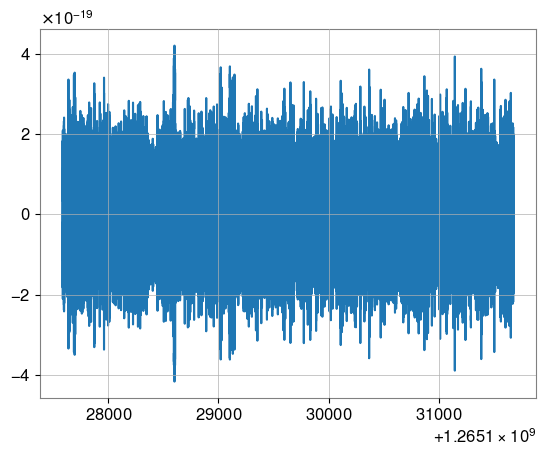

In [94]:
# plotting full frame 
start_time = 1265127585
end_time = 1265127585 + 4096

data = TimeSeriesDict.read(datafile, [channel_DC], start = start_time, end = end_time)[channel_DC]
plt.plot(data)

In [95]:
data.sample_rate

<Quantity 4096. Hz>

In [96]:
data.t0

<Quantity 1.26512758e+09 s>

In [97]:
data.duration

<Quantity 4096. s>

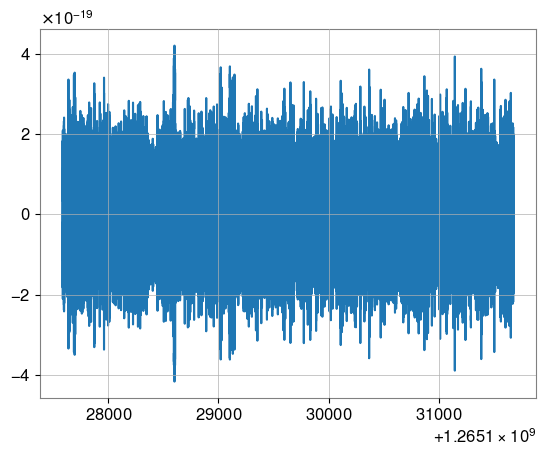

In [98]:
plt.plot(data)

In [99]:
ls /home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/injected_before_dc/

V1_BBH_inj_1265127585_4096.hdf5


In [100]:
datafile = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename/noise-signal_before-dc/stain_signal/original-1265127585-4096.h5"
start_time = 1265127585
end_time = 1265127585 + 4096

data = timeSeries_from_h5 (datafile,  channel = "V1:Hrec_hoft_raw_20000Hz")


The new files are as follows:   
/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/142-162_Hz_for_30Mpc

V1_BBH_inj_1265127585_4096.hdf5: The injection file (containing the signals)
noise_ORG: The original noise
noise_DC: The cleaned noise, without any signal injection
noise-signal_before_DC: The noise combined with the signal
noise-signal_after_DC: The cleaned noise combined with the signal

In [101]:
pid = 25
injections_csv  = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/INJ-1265127585-4096.csv"
injections = pd.read_csv(injections_csv)
injection_times = injections['geocent_time'].to_list()
trigtime = injection_times[pid]

start_time = trigtime - 50
end_time = start_time + 50




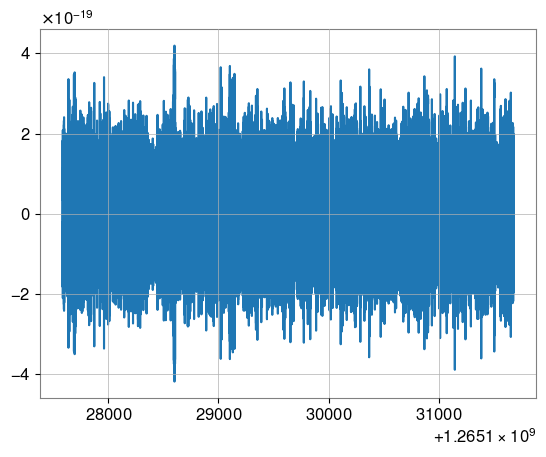

In [102]:
datafile = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/142-162_Hz_for_30Mpc/noise-signal_after_DC/Hrec-HOFT-1265127585-4096.gwf"

# plotting full frame 
start_time = 1265127585
end_time = 1265127585 + 4096

data = TimeSeriesDict.read(datafile, [channel_DC], start = start_time, end = end_time)[channel_DC]
data.write("data/deepclean-NoisePlusSignal.gwf")
plt.plot(data)

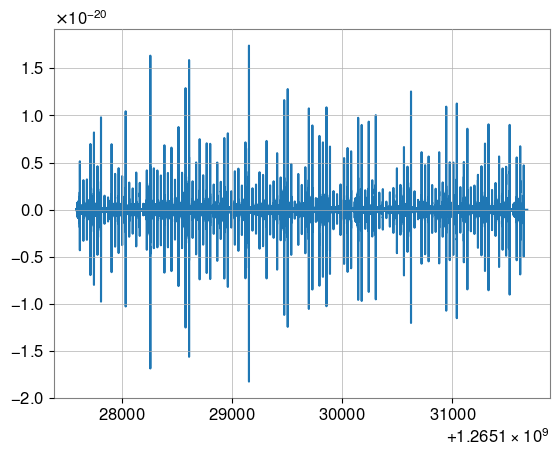

In [103]:
# plotting full frame 
datafile_noise = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/142-162_Hz_for_30Mpc/noise_DC/Hrec-HOFT-1265127585-4096.gwf"

data_noise = TimeSeries.read(datafile_noise, "V1:Hrec_hoft_raw_20000Hz_DC", start = start_time, end = end_time)
data_noise.write("data/deepclean-NoiseOnly.gwf")

plt.plot(data - data_noise)

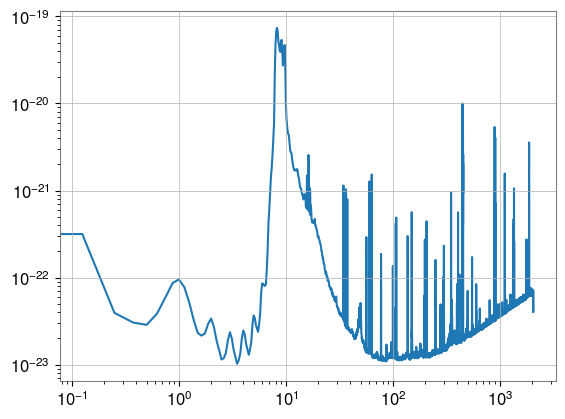

In [104]:
dc_asd = data_noise.asd(fftlength = 8, method = 'median', overlap = 4)
dc_psd_array = np.array([dc_asd.frequencies.value, dc_asd.value**2]).T
dc_asd_array = np.array([dc_asd.frequencies.value, dc_asd.value]).T
np.savetxt(X=dc_asd_array, fname = "data/_org.txt")
np.savetxt(X=dc_psd_array, fname = "data/psd_org.txt")

plt.loglog(dc_asd)

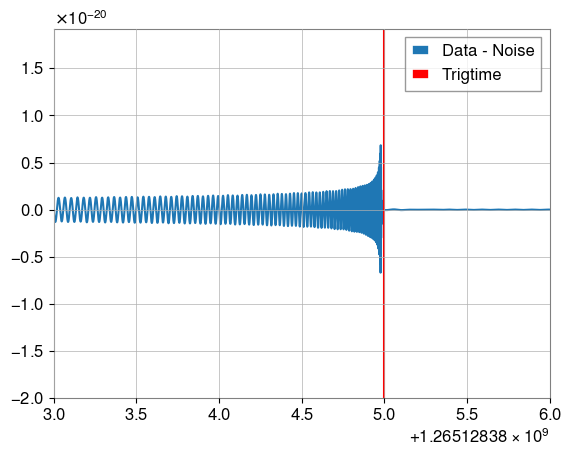

In [105]:
plt.plot(data-data_noise)
plt.xlim(trigtime-2, trigtime+1)
plt.axvline(trigtime, color = 'red')
plt.legend(["Data - Noise", 'Trigtime'])


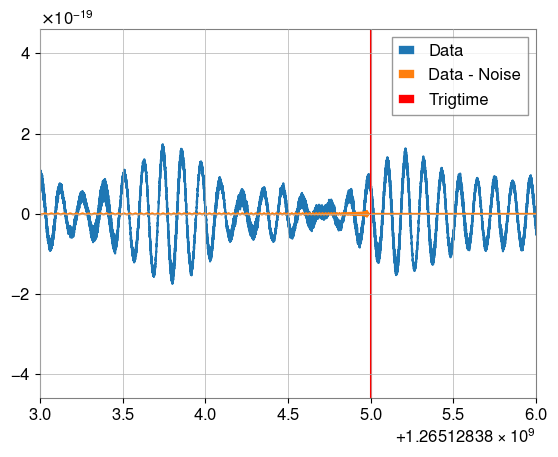

In [106]:
plt.plot(data)
plt.plot(data-data_noise)
plt.xlim(trigtime-2, trigtime+1)
plt.axvline(trigtime, color = 'red')
plt.legend(["Data","Data - Noise", 'Trigtime'])


## plot thr original data (before deepclean)

In [107]:
ls /home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename

noise/                  noise-signal_before-dc/                signal/
noise-signal_after-dc/  noise_substraction_without_injection/


In [108]:
#data_raw = timeSeries_from_h5 (
filename = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename/noise-signal_before-dc/stain_signal/original-1265127585-4096.h5"
channel = 'V1:Hrec_hoft_raw_20000Hz'


In [109]:
with h5py.File(filename, 'r') as h5_file:
    # Iterate through the file and print structure
    def print_structure(name, obj):
        print(name)
        
    h5_file.visititems(print_structure)


V1:ASC_B1p_QD1_V
V1:ASC_B1p_QD1_V_56MHz_Q
V1:ASC_B1p_QD2_V
V1:ASC_B4_QD1_H_56MHz_I
V1:ASC_B4_QD1_V_56MHz_Q
V1:ASC_B4_QD2_V_56MHz_Q
V1:ASC_B5_QD1_H_56MHz_Q
V1:ASC_B5_QD1_V_56MHz_I
V1:ASC_B5_QD1_V_56MHz_Q
V1:ASC_B5_QD2_H_56MHz_Q
V1:ASC_BS_DOF_TY_CORR
V1:ASC_DIFFp_TX_ERR
V1:ENV_CEB_ELECTRIC
V1:ENV_CEB_IPS_VOLT_R
V1:ENV_CEB_IPS_VOLT_S
V1:ENV_CEB_IPS_VOLT_T
V1:ENV_CEB_MAG_N
V1:ENV_CEB_MAG_V
V1:ENV_CEB_MAG_W
V1:ENV_CEB_UPS_VOLT_R
V1:ENV_CEB_UPS_VOLT_S
V1:ENV_CEB_UPS_VOLT_T
V1:ENV_EER_MAG_2
V1:ENV_EIB_ACC_Y
V1:ENV_EXT_MAG_N
V1:ENV_EXT_MAG_W
V1:ENV_IB_CT_ACC_X
V1:ENV_IB_CT_FINGER_ACC_Y
V1:ENV_LB_ACC_Z
V1:ENV_MAG_CURR_MONI
V1:ENV_MCB_IPS_CURR_R
V1:ENV_MCB_IPS_CURR_S
V1:ENV_MCB_IPS_CURR_T
V1:ENV_MCB_IPS_VOLT_R
V1:ENV_MCB_IPS_VOLT_S
V1:ENV_MCB_IPS_VOLT_T
V1:ENV_MCB_MAG_N
V1:ENV_MCB_UPS_CURR_R
V1:ENV_MCB_UPS_CURR_S
V1:ENV_MCB_UPS_CURR_T
V1:ENV_MCB_UPS_VOLT_R
V1:ENV_MCB_UPS_VOLT_S
V1:ENV_MCB_UPS_VOLT_T
V1:ENV_NEB_IPS_VOLT_R
V1:ENV_NEB_IPS_VOLT_S
V1:ENV_NEB_IPS_VOLT_T
V1:ENV_NEB_MAG_N
V1:ENV_NEB_MAG

In [110]:
filename = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename/noise-signal_before-dc/stain_signal/original-1265127585-4096.h5"
channel = 'V1:Hrec_hoft_raw_20000Hz'

with h5py.File(filename, 'r') as h5_file:
    # Access a specific dataset
    dataset = h5_file[channel][:]
    print(dataset)
raw_data = TimeSeries(dataset, channel = channel, t0=data_noise.t0.value, sample_rate = data_noise.sample_rate.value)
raw_data.write("data/original-NoisePlusSignal.gwf")


[-4.73200011e-20 -3.71218464e-20 -3.02421271e-20 ...
  3.07234945e-20  2.66110272e-20  2.40747298e-20]


In [111]:
filename_raw_noise = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename/noise/original-1265127585-4096.h5"

In [112]:
with h5py.File(filename_raw_noise, 'r') as h5_file:
    # Iterate through the file and print structure
    def print_structure(name, obj):
        print(name)
        
    h5_file.visititems(print_structure)



V1:ASC_B1p_QD1_V
V1:ASC_B1p_QD1_V_56MHz_Q
V1:ASC_B1p_QD2_V
V1:ASC_B4_QD1_H_56MHz_I
V1:ASC_B4_QD1_V_56MHz_Q
V1:ASC_B4_QD2_V_56MHz_Q
V1:ASC_B5_QD1_H_56MHz_Q
V1:ASC_B5_QD1_V_56MHz_I
V1:ASC_B5_QD1_V_56MHz_Q
V1:ASC_B5_QD2_H_56MHz_Q
V1:ASC_BS_DOF_TY_CORR
V1:ASC_DIFFp_TX_ERR
V1:ENV_CEB_ELECTRIC
V1:ENV_CEB_IPS_VOLT_R
V1:ENV_CEB_IPS_VOLT_S
V1:ENV_CEB_IPS_VOLT_T
V1:ENV_CEB_MAG_N
V1:ENV_CEB_MAG_V
V1:ENV_CEB_MAG_W
V1:ENV_CEB_UPS_VOLT_R
V1:ENV_CEB_UPS_VOLT_S
V1:ENV_CEB_UPS_VOLT_T
V1:ENV_EER_MAG_2
V1:ENV_EIB_ACC_Y
V1:ENV_EXT_MAG_N
V1:ENV_EXT_MAG_W
V1:ENV_IB_CT_ACC_X
V1:ENV_IB_CT_FINGER_ACC_Y
V1:ENV_LB_ACC_Z
V1:ENV_MAG_CURR_MONI
V1:ENV_MCB_IPS_CURR_R
V1:ENV_MCB_IPS_CURR_S
V1:ENV_MCB_IPS_CURR_T
V1:ENV_MCB_IPS_VOLT_R
V1:ENV_MCB_IPS_VOLT_S
V1:ENV_MCB_IPS_VOLT_T
V1:ENV_MCB_MAG_N
V1:ENV_MCB_UPS_CURR_R
V1:ENV_MCB_UPS_CURR_S
V1:ENV_MCB_UPS_CURR_T
V1:ENV_MCB_UPS_VOLT_R
V1:ENV_MCB_UPS_VOLT_S
V1:ENV_MCB_UPS_VOLT_T
V1:ENV_NEB_IPS_VOLT_R
V1:ENV_NEB_IPS_VOLT_S
V1:ENV_NEB_IPS_VOLT_T
V1:ENV_NEB_MAG_N
V1:ENV_NEB_MAG

In [113]:
filename_raw_noise = "/home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/rename/noise/original-1265127585-4096.h5"

with h5py.File(filename_raw_noise, 'r') as h5_file:
    # Access a specific dataset
    dataset = h5_file[channel][:]
    print(dataset)
    
raw_noise = TimeSeries(dataset,  channel = channel, t0=data_noise.t0.value, sample_rate = data_noise.sample_rate.value)
raw_noise.write("data/original-NoiseOnly.gwf")



[-4.73200011e-20 -3.71218464e-20 -3.02421271e-20 ...
  3.07234945e-20  2.66110272e-20  2.40747298e-20]


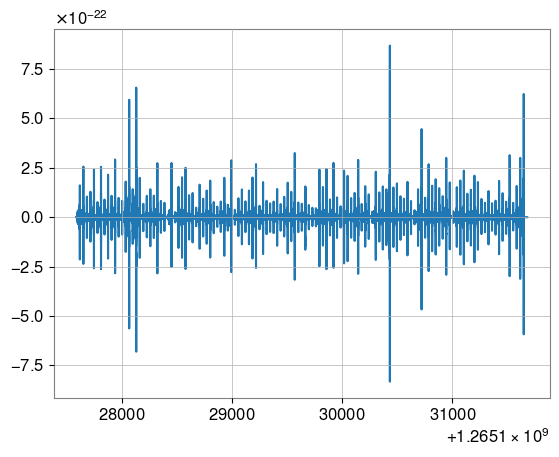

In [114]:
plt.plot(raw_data - raw_noise)

In [115]:
ls data

asd_dc.txt                     original-NoiseOnly.gwf
asd_org.txt                    original-NoisePlusSignal.gwf
deepclean-NoiseOnly.gwf        psd_dc.txt
deepclean-NoisePlusSignal.gwf  psd_org.txt
_org.txt


In [116]:
pwd

'/home/muhammed.saleem/deepClean/deepclean/virgo_pe'

In [117]:
cat /home/weizmann.kiendrebeogo/DeepClean/saleem-Dc/BBH_V1_142-165_Hz.prior

mass_1 = Uniform(minimum=5.0, maximum=50.0, name='mass_1', latex_label='$m_1$', unit='$M_{\\odot}$', boundary='reflective')
mass_2 = Uniform(minimum=5.0, maximum=50.0, name='mass_2', latex_label='$m_2$', unit='$M_{\\odot}$', boundary='reflective')
total_mass = Constraint(minimum=26.64954400385941, maximum=30.966019441104244, name='total_mass', latex_label='$M$', unit='$M_{\\odot}$')
luminosity_distance = bilby.gw.prior.UniformComovingVolume(minimum=10.0, maximum=1000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$D_L$', unit='Mpc', boundary=None)
mass_ratio = Constraint(minimum=0.4, maximum=1.0, name='mass_ratio', latex_label='$q$', unit=None)
a_1 = Uniform(minimum=0, maximum=0.99, name='a_1', latex_label='$a_1$', unit=None, boundary='reflective')
a_2 = Uniform(minimum=0, maximum=0.99, name='a_2', latex_label='$a_2$', unit=None, boundary='reflective')
tilt_1 = 0
tilt_2 = 0
phi_12 = 0
phi_jl = 0
dec = Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, na

In [118]:
data_noise.sample_rate

<Quantity 4096. Hz>

In [119]:
org_asd = raw_noise.asd(fftlength = 8, method = 'welch', overlap = 0)

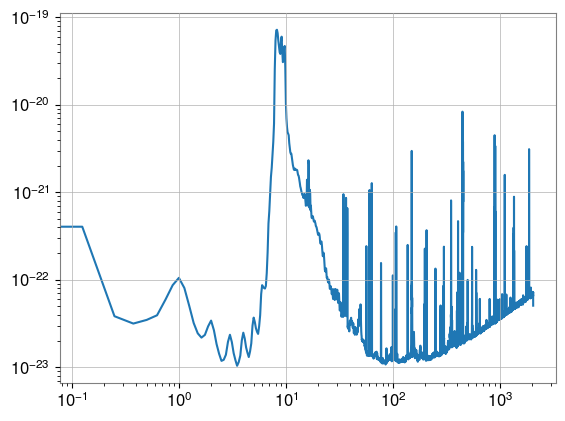

In [120]:
plt.loglog(org_asd)

In [121]:
org_psd_array = np.array([org_asd.frequencies.value, org_asd.value**2]).T
org_asd_array = np.array([org_asd.frequencies.value, org_asd.value]).T
np.savetxt(X=org_asd_array, fname = "data/asd_org.txt")
np.savetxt(X=org_psd_array, fname = "data/psd_org.txt")

In [124]:
datadir = "/home/muhammed.saleem/deepClean/deepclean/virgo_pe/data"

datafile_dc_NoiseOnly = os.path.join(datadir, "deepclean-NoiseOnly.gwf")
datafile_dc_NoisePlusSignal = os.path.join(datadir, "deepclean-NoisePlusSignal.gwf")

datafile_org_NoiseOnly = os.path.join(datadir, "original-NoiseOnly.gwf")
datafile_org_NoisePlusSignal = os.path.join(datadir, "original-NoisePlusSignal.gwf")

channel_org = "V1:Hrec_hoft_raw_20000Hz"
channel_dc  = "V1:Hrec_hoft_raw_20000Hz_DC"


In [126]:
loaded_data = TimeSeries.read(datafile_dc_NoisePlusSignal, channel = channel_dc, start = start_time, end = end_time)


In [127]:
loaded_data

<TimeSeries([-4.73200159e-20, -3.71218638e-20, -3.02421470e-20,
             ...,  3.07234945e-20,  2.66110272e-20,
              2.40747298e-20]
            unit=Unit(dimensionless),
            t0=<Quantity 1.26512758e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='V1:Hrec_hoft_raw_20000Hz_DC',
            channel=<Channel("V1:Hrec_hoft_raw_20000Hz_DC", 4096.0 Hz) at 0x7f83a3e90790>)>

In [128]:
ls data

asd_dc.txt                     original-NoiseOnly.gwf
asd_org.txt                    original-NoisePlusSignal.gwf
deepclean-NoiseOnly.gwf        psd_dc.txt
deepclean-NoisePlusSignal.gwf  psd_org.txt
_org.txt


In [129]:
psd_filename = "data/psd_dc.txt"
det = "V1"
masked_finite_psd = np.loadtxt(psd_filename)[:,1]


In [130]:
masked_finite_psd

array([1.97622652e-43, 1.00049652e-43, 1.54038588e-45, ...,
       4.67874815e-45, 4.41887413e-45, 1.65201952e-45])